In [1]:
pip list

Package                   Version
------------------------- --------------
anyio                     4.3.0
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.1
async-lru                 2.0.4
attrs                     23.2.0
Babel                     2.14.0
beautifulsoup4            4.12.3
bleach                    6.1.0
certifi                   2024.2.2
cffi                      1.16.0
charset-normalizer        3.3.2
clip                      0.2.0
colorama                  0.4.6
comm                      0.2.2
debugpy                   1.8.1
decorator                 5.1.1
defusedxml                0.7.1
executing                 2.0.1
ez-setup                  0.9
fastjsonschema            2.19.1
fqdn                      1.5.1
ftfy                      6.1.3
h11                       0.14.0
httpcore                  1.0.4
httpx                     0.27.0
idna                      3.6
ipykernel            

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
date = pd.read_excel("date.xlsx")
date

,Unnamed: 0,time_point,aqi,pm2_5,pm10,so2,no2,co,o3,rank,quality
0,0,2013-12-02,251,201,313,155,77,3.2,17,90.0,重度污染
1,1,2013-12-03,127,97,153,69,50,2.1,31,39.0,轻度污染
2,2,2013-12-04,90,57,130,90,52,2.2,25,13.0,良
3,3,2013-12-05,77,41,104,70,48,1.9,34,23.0,良
4,4,2013-12-06,123,88,195,97,67,2.3,26,46.0,轻度污染
...,...,...,...,...,...,...,...,...,...,...,...
3784,3784,2024-04-19,149,70,247,4,19,0.4,98,260.0,轻度污染
3785,3785,2024-04-20,122,66,194,6,34,0.5,85,324.0,轻度污染
3786,3786,2024-04-21,117,55,183,6,39,0.5,125,312.0,轻度污染
3787,3787,2024-04-22,91,43,132,6,36,0.5,130,317.0,良


In [14]:
%matplotlib inline

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

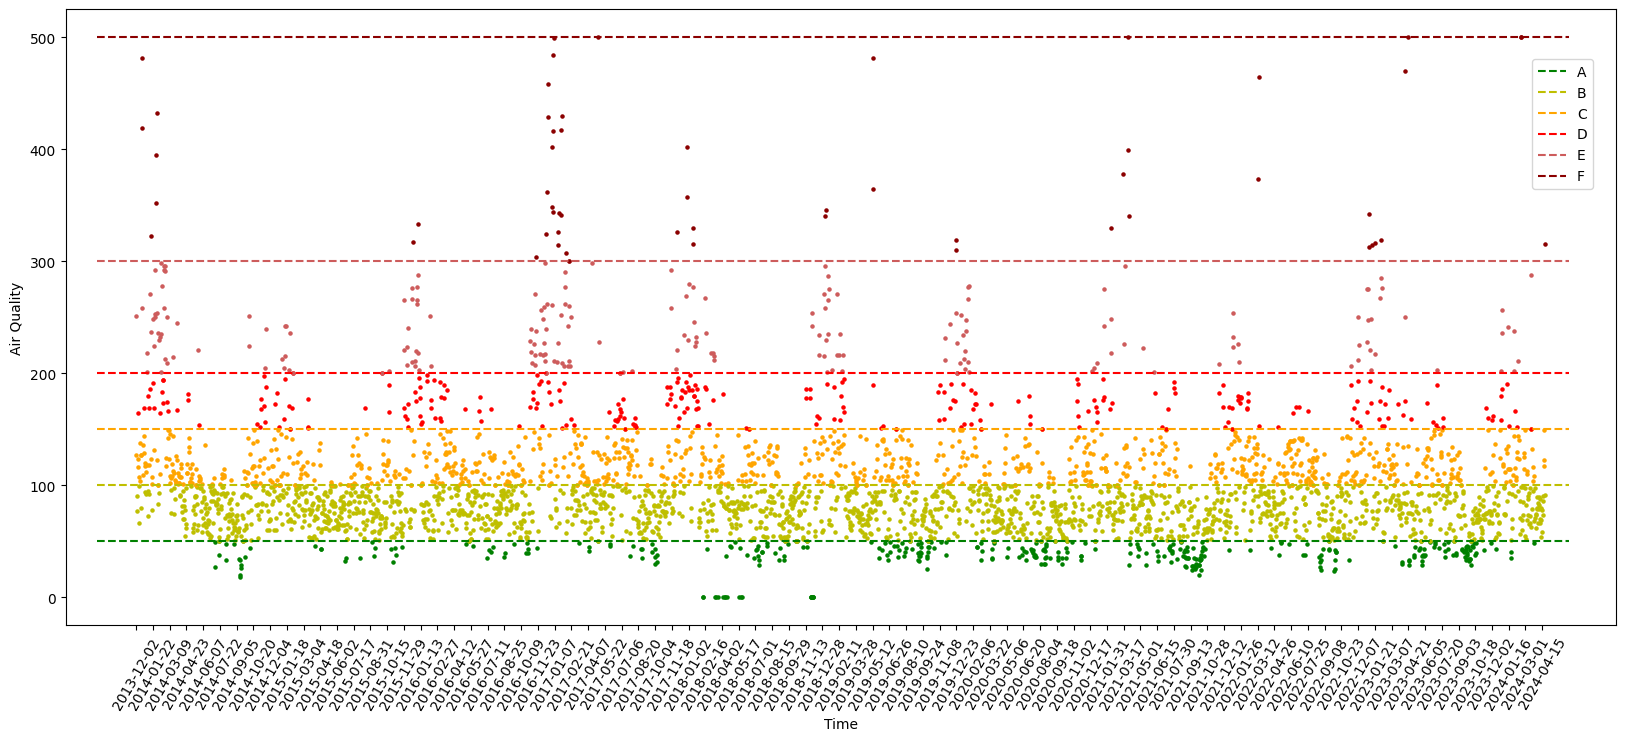

In [67]:
x = date['time_point']
y = date['aqi']
z = date['rank']
# plt.rcParams['font.sans-serif'] = ['SimHei']
plt.figure(figsize=(20, 8))
a = 50
b = 100
c = 150
d = 200
e = 300
f = 500
aa = np.ma.masked_where(y > a, y)
bb = np.ma.masked_where((y < a) | (y > b), y)
cc = np.ma.masked_where((y < b) | (y > c), y)
dd = np.ma.masked_where((y < c) | (y > d), y)
ee = np.ma.masked_where((y < d) | (y > e), y)
ff = np.ma.masked_where(y < e, y)
# aa = np.ma.masked_where(y < a, y)
# aa = np.ma.masked_where(y < a, y)
# aa = np.ma.masked_where(y < a, y)

plt.axhline(y=50, xmin=0.02, xmax=0.97, color='g', linestyle="--", label='A')
plt.axhline(y=100, xmin=0.02, xmax=0.97, color='y', linestyle="--", label='B')
plt.axhline(y=150, xmin=0.02, xmax=0.97, color='orange', linestyle="--", label='C')
plt.axhline(y=200, xmin=0.02, xmax=0.97, color='r', linestyle="--", label='D')
plt.axhline(y=300, xmin=0.02, xmax=0.97, color='indianred', linestyle="--", label='E')
plt.axhline(y=500, xmin=0.02, xmax=0.97, color='darkred', linestyle="--", label='F')
plt.xticks(range(0, len(x), 45), rotation = 60)
plt.xlabel('Time')
plt.ylabel('Air Quality')
plt.scatter(x, aa, color='g', s=5)
plt.scatter(x, bb, color='y', s=5)
plt.scatter(x, cc, color='orange', s=5)
plt.scatter(x, dd, color='r', s=5)
plt.scatter(x, ee, color='indianred', s=5)
plt.scatter(x, ff, color='darkred', s=5)
# plt.plot(x, z)
plt.legend(bbox_to_anchor=(0.99,0.93), frameon=True)
plt.show()

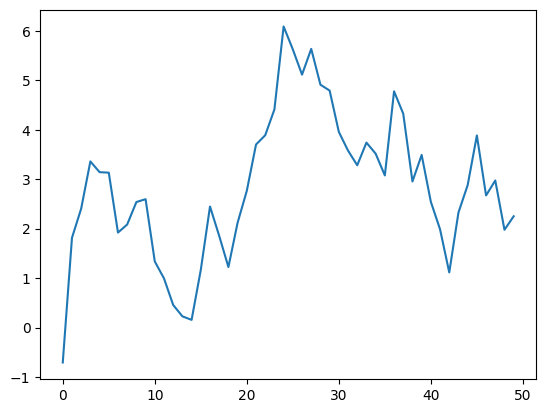

In [7]:
plt.plot(np.random.randn(50).cumsum())